In [1]:
import sys

sys.path.append("..")
from settings import *
from lattice.opticallattice import *
import matplotlib.colors as colors

## Generate potentials from 3D Gaussian beams

In [2]:
waist = 60e-6
theta = -pi / 4

# transmission from the glass cell
t = (0.73**0.5) ** 0.5


z_offset = 0.0

f1, f2, f3, f4 = (
    np.array([0, 0, 0]),
    np.array([0, 0, 0]),
    np.array([0, 0, 0]),
    np.array([0, 0, 0]),
)


f1 = np.array([np.sqrt(2), np.sqrt(2), 0]) * 0 * 1e-3
f2 = np.array([np.sqrt(2), np.sqrt(2), 0]) * 0 * 1e-3
# f1 = [np.sqrt(2), np.sqrt(2), 0]
f1 = np.array([0.5, -0.5, 0]) * waist / np.sqrt(2)
f2 = np.array([-1, 1, 0]) * waist / np.sqrt(2)
# f4 = np.array([-.5,.5,0]) * waist/np.sqrt(2)
# f2 = np.array([-1.5,-1.5,0]) * waist/np.sqrt(2)

L1 = GaussianBeam3D(
    waist, focuspos=f1, prop_dir=np.array([np.cos(theta), np.sin(theta), 0])
)
L2 = GaussianBeam3D(
    waist,
    focuspos=f2,
    prop_dir=np.array([np.cos(theta + pi / 2), np.sin(theta + pi / 2), 0]),
)
L3 = GaussianBeam3D(
    waist,
    focuspos=f3,
    prop_dir=np.array([-np.cos(theta + pi / 2), -np.sin(theta + pi / 2), 0]),
)
L4 = GaussianBeam3D(
    waist, focuspos=f4, prop_dir=np.array([-np.cos(theta), -np.sin(theta), 0])
)

c:\Users\janet\ownCloud - Janet Qesja (jqesja)@datashare.mpcdf.mpg.de\phd_code\fermiqp_physics\fermiqp-physics\projects\..\lattice\opticallattice.py:492: UserWarning: E-field calculation doesn't account for power
  warnings.warn("E-field calculation doesn't account for power")


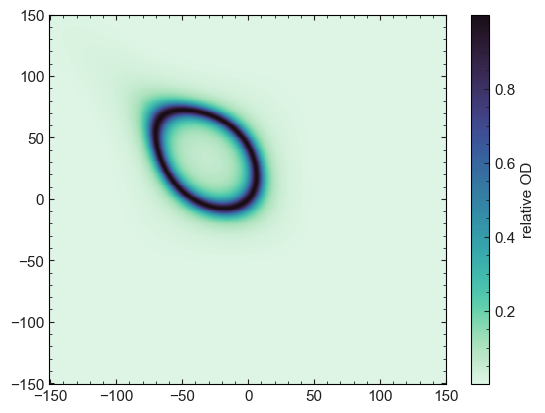

In [3]:
## OD ring structure

omega_max = 1.4e6  ## estimated trap frequency in the center
raman_detuning = 1.2e6  ## Raman spectrum detuning we use

# x = np.linspace(-1, 1, 75000) * 1e-6
x = np.arange(-200, 200) * 0.752e-6
X, Y = np.meshgrid(x, x)
# Y = 0.
Z = 0.0

E1 = L1.field([X, Y, Z])
E2 = L2.field([X, Y, Z])
E3 = L3.field([X, Y, Z])
E4 = L4.field([X, Y, Z])

# U = np.abs(t*E1+t**3*E2+t**5*E3+1*t**7*E4)**2
U = np.abs(t * E1 + t**3 * E2 + t**5 * E3 + 1 * t**7 * E4) ** 2
omega = np.sqrt(U / U.max()) * omega_max
OD = (50e3) ** 2 / ((omega - raman_detuning) ** 2 + (50e3) ** 2)

# plt.figure(figsize=(10,8))

plt.pcolormesh(X * 1e6, Y * 1e6, OD, vmin=None, vmax=None)
# plt.plot(x*1e6, U/U.max()*1.5)
# plt.imshow(U/U.max(), norm=colors.LogNorm(vmin=1e-2, vmax=1), cmap='RdBu_r')
plt.colorbar(label="relative OD")

## Potential

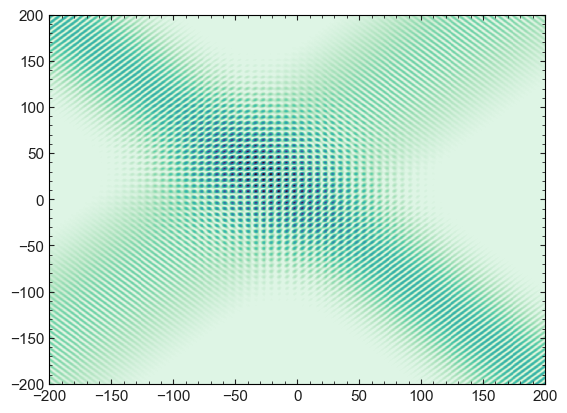

In [4]:
x = np.linspace(-200, 200, 1000) * 1e-6
# x = np.arange(-100,100) * 0.752e-6
X, Y = np.meshgrid(x, x)
# Y = 0.
Z = 0.0

E1 = L1.field([X, Y, Z])
E2 = L2.field([X, Y, Z])
E3 = L3.field([X, Y, Z])
E4 = L4.field([X, Y, Z])

U = np.abs(1 * t * E1 + t**3 * E2 + t**5 * E3 + t**7 * E4) ** 2

U = U / U.max()

plt.pcolormesh(X * 1e6, Y * 1e6, U, vmin=1e-2, vmax=1)
# plt.plot(x*1e6, U/U.max()*1.5)

In [5]:
t

0.924337803257961

In [6]:
theta

-0.7853981633974483

In [7]:
np.rad2deg(theta)

-45.0